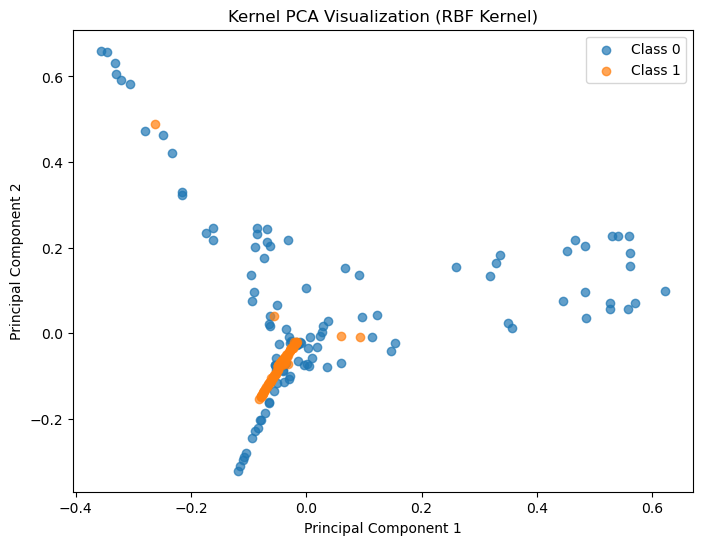

Accuracy: 0.7444444444444445

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.84      0.74        38
           1       0.85      0.67      0.75        52

    accuracy                           0.74        90
   macro avg       0.75      0.76      0.74        90
weighted avg       0.77      0.74      0.75        90


Confusion Matrix:
 [[32  6]
 [17 35]]


In [1]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Generate Synthetic Dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Apply Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=15)  # RBF kernel with gamma=15
X_train_kpca = kernel_pca.fit_transform(X_train_scaled)
X_test_kpca = kernel_pca.transform(X_test_scaled)

# Step 6: Visualize the Data in 2D Space
plt.figure(figsize=(8, 6))
plt.scatter(X_train_kpca[y_train == 0, 0], X_train_kpca[y_train == 0, 1], label="Class 0", alpha=0.7)
plt.scatter(X_train_kpca[y_train == 1, 0], X_train_kpca[y_train == 1, 1], label="Class 1", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Kernel PCA Visualization (RBF Kernel)")
plt.legend()
plt.show()

# Step 7: Train a Logistic Regression Classifier on Kernel PCA Features
clf = LogisticRegression()
clf.fit(X_train_kpca, y_train)

# Step 8: Make Predictions
y_pred = clf.predict(X_test_kpca)

# Step 9: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
